<a href="https://colab.research.google.com/github/danabuogi/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow as tf
from tensorflow import feature_column

In [ ]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train = dftrain.pop("survived")
y_eval = dfeval.pop("survived")

CATEGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class","deck",
                       "embark_town", "alone"]

NUMERIC_COLUMNS = ["age", "fare"]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() # this gets a list of all unique values from a given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    def input_function(): # this inner function is to be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # creating tf.dataset object
        if shuffle:
            ds = ds.shuffle(1000) # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) # splits data into batches of 32 and repeats process for number of epochs
        return ds # returns a batch of the dataset
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle = False)

Creating the model

In [105]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

In [106]:
linear_est.train(train_input_fn) # trains the model
evaluation_result = linear_est.evaluate(eval_input_fn) # tests the model and obtains its metrics
clear_output()
print(evaluation_result["accuracy"]) # provides a dictionary of stats about the model
print(evaluation_result)

0.74242425
{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.83116007, 'auc_precision_recall': 0.79798627, 'average_loss': 0.4787426, 'label/mean': 0.375, 'loss': 0.47242296, 'precision': 0.6597938, 'prediction/mean': 0.39430898, 'recall': 0.64646465, 'global_step': 200}


In [107]:
result = list(linear_est.predict(eval_input_fn))
print(result)
print(result[0]["probabilities"][0])

[{'logits': array([-2.2902052], dtype=float32), 'logistic': array([0.09193742], dtype=float32), 'probabilities': array([0.9080627 , 0.09193742], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.5385676], dtype=float32), 'logistic': array([0.36852086], dtype=float32), 'probabilities': array([0.63147914, 0.36852086], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.1729448], dtype=float32), 'logistic': array([0.7636768], dtype=float32), 'probabilities': array([0.23632312, 0.7636769 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.87462443], dtype=f

In [108]:
print(dfeval.loc[3])
print(result[3]["probabilities"][1]) # probability of a specific passenger not surviving

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
0.705707


In [109]:
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]["probabilities"][1]) # the male passenger survived despite having the probability of survival at 0.25

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.2983563


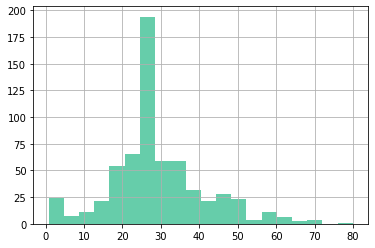

In [110]:
train_df.age.hist(bins=20, color = "MediumAquamarine")
plt.show()

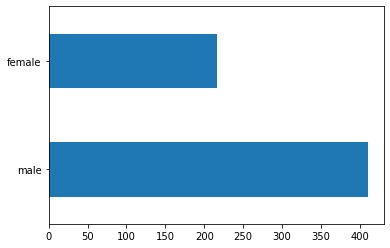

In [111]:
train_df.sex.value_counts().plot(kind="barh")
plt.show()

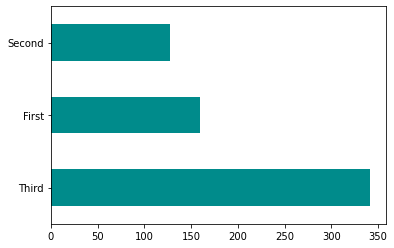

In [ ]:
train_df["class"].value_counts().plot(kind="barh", color = "DarkCyan")
plt.show()

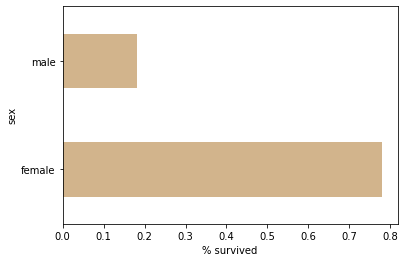

In [ ]:
pd.concat([train_df, y_train], axis = 1).groupby("sex").survived.mean().plot(kind="barh", color = "Tan").set_xlabel("% survived")
plt.show()